# Simple Linear Regression  ( Involves Only 1 input variable)

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [24]:
data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [25]:
data.duplicated().sum()

np.int64(0)

In [26]:
data.shape

(10000, 3)

#### Lets check the correlation between each variables

<function matplotlib.pyplot.show(close=None, block=None)>

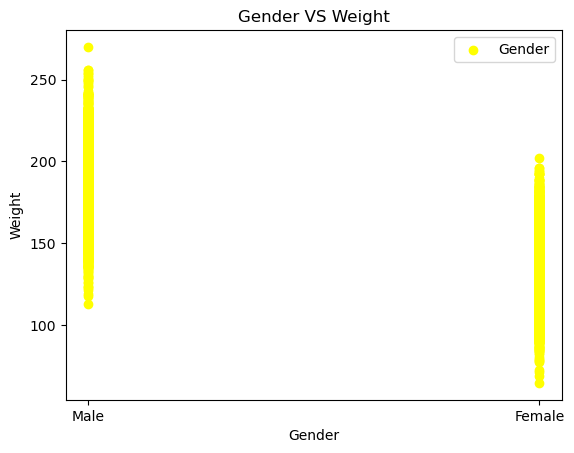

In [27]:
X1 = data.iloc[:,0].values
y1 = data.iloc[:,2].values
plt.scatter(X1,y1,label='Gender',color='yellow')
plt.title('Gender VS Weight')
plt.xlabel('Gender')
plt.ylabel('Weight')
plt.legend()
plt.show


In [28]:
data.Gender = data.Gender.apply(lambda x: 0 if x=='Female' else 1)

In [29]:
data.Gender.corr(data.Weight)

np.float64(0.7967233452062232)

Here in the above plot, we can see **weight is not atall dependent on Gender**.
So,Gender variable **is not useful** for our prediction.

<function matplotlib.pyplot.show(close=None, block=None)>

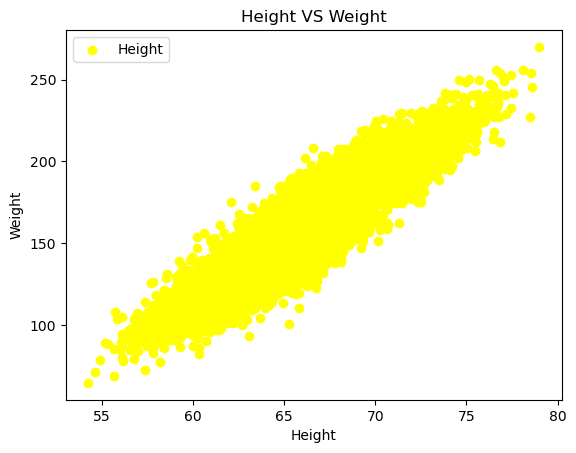

In [30]:
X2 = data.iloc[:,1].values
y2 = data.iloc[:,2].values
plt.scatter(X2,y2,label='Height',color='yellow')
plt.title('Height VS Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show

From the above plot can have idea that **weight and height are highly dependent** on each other.In other words,we can say that as **height increases ,weight also increases**.


In [31]:
X = data.drop(['Gender','Weight'],axis=1).values
print(X)

[[73.84701702]
 [68.78190405]
 [74.11010539]
 ...
 [63.86799221]
 [69.03424313]
 [61.94424588]]


In [32]:
y = data.Weight.values
print(y)

[241.8935632 162.3104725 212.7408556 ... 128.4753188 163.8524613
 113.6491027]


**Step 2-Splitting the dataset into training and testing set**

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=1321)

#### Step 3-Build a linear model

In [49]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [50]:
lr.fit(X_trian,y_train)

LinearRegression()

In [51]:
print('Cofficients',lr.coef_)
print('Intercept',lr.intercept_)

Cofficients [7.73190342]
Intercept -351.79070507483266


# Prediction on Training Data : Training Accuracy 

In [52]:
y_pred_train = lr.predict(X_trian)

In [53]:
pd.DataFrame({'Original Weight':y_train,'Predicted Weight':y_pred_train})

,Original Weight,Predicted Weight
0,172.794261,171.947181
1,147.029164,136.865319
2,226.701023,223.526217
3,161.431658,153.409738
4,149.599596,152.788998
...,...,...
7995,178.918714,193.225172
7996,131.395557,145.067915
7997,122.924680,125.777442
7998,141.375098,132.066580


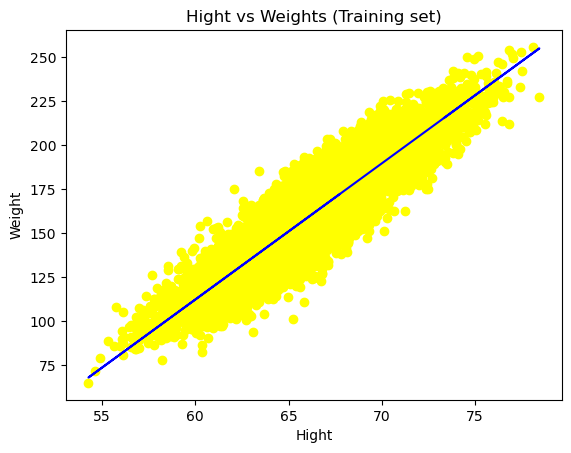

In [54]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'Yellow')
plt.plot(X_train, y_pred_train, color = 'blue')
plt.title('Hight vs Weights (Training set)')
plt.xlabel('Hight')
plt.ylabel('Weight')
plt.show()

In [57]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [58]:
mean_absolute_error(y_train,y_pred_train)

9.756113441561594

In [59]:
mean_squared_error(y_train,y_pred_train)

149.64407317577798

In [60]:
r2_score(y_train,y_pred_train)

0.8543800481054292

In [62]:
print('Variance Score %.2f' % lr.score(X_train,y_train))

Variance Score 0.85


# Prediction on Testing Data : Testing Accuracy 

In [64]:
y_pred_test = lr.predict(X_test)

pd.DataFrame({'Original':y_test,'Predicted':y_pred_test})

In [66]:
mean_squared_error(y_test,y_pred_test),mean_absolute_error(y_test,y_pred_test),r2_score(y_test,y_pred_test)

(147.94179790891212, 9.70570397013335, 0.8582251675081171)

### Step 5-Checking the accuracy


In [70]:
print('Variance Score %.2f' % lr.score(X_test,y_test))

Variance Score 0.86


In [71]:
def predict_Weight(height):
    return lr.predict([[height]])

In [75]:
height = float(input("If you gussa your Wieght So Please provide me you height in feet"))*12
print(f"Our model says your Weight is {(predict_Weight(height)*0.453592)[0]}Kgs")

If you gussa your Wieght So Please provide me you height in feet 5.5


Our model says your Weight is 71.90110001879361Kgs
